In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


In [11]:
raw_data = pd.read_csv('ARE_installed_capacity_per_fuel.csv', index_col=0)
solar_data_raw = raw_data['Solar [MW]']

AttributeError: 'list' object has no attribute 'set_height'

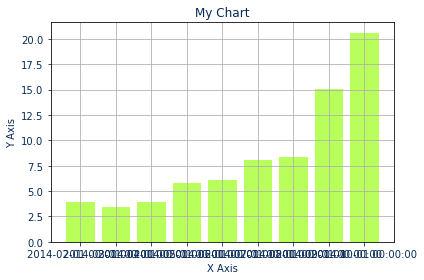

In [24]:
solar_data = solar_data_raw[1:10]
fig = plt.figure()

position = solar_data.index 

plt.tick_params(axis = 'x', colors = '#072b57')
plt.tick_params(axis = 'y', colors = '#072b57')

speeds = np.ones(len(solar_data))
heights = solar_data
rects = plt.bar(position, heights, align = 'center', color = '#b8ff5c') 
#plt.xticks(position, ('A', 'B', 'C', 'D', 'E', 'F'))

plt.xlabel('X Axis', color = '#072b57')
plt.ylabel('Y Axis', color = '#072b57')
plt.title('My Chart', color = '#072b57')

#plt.ylim((0,100))
#plt.xlim((0,6))

plt.grid(True)

rs = [r for r in rects]

def init():
    return rs

def animate(i):
    global rs, heights
    #if all(map(lambda x: x==np.max(solar_data), heights)):
    #    heights = np.zeros(len(solar_data))
    #else:
    #    heights = [min(h+s,np.max(solar_data)) for h,s in zip(heights,speeds)]
    #for h,r in zip(heights,rs):
    #    r.set_height(h)
    heights = [min(h,np.max(solar_data)) for h in heights]
    for h,r in zip(heights,rs):
        r.set_height(h)
    return rs

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=200, interval=20, blit=True)

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

anim

In [20]:
import pandas_alive
import pandas as pd

raw_data = pd.read_csv('ARE_installed_capacity_per_fuel.csv', index_col=0)
solar_data = raw_data[['Solar [MW]']]
solar_data = solar_data[1:10]

In [21]:
solar_data.head()

,Solar [MW]
index,
2014-02-01 00:00:00,3.9
2014-03-01 00:00:00,3.4
2014-04-01 00:00:00,3.9
2014-05-01 00:00:00,5.8
2014-06-01 00:00:00,6.1


In [22]:
solar_data.index = pd.to_datetime(solar_data.index)

In [23]:
solar_data.plot_animated(kind='bar',filename="total-population-over-time-line.gif",period_fmt="%M",title="Total Population Over Time")

Generating BarChart, plotting ['Solar [MW]']


C:\Git\energy-climate-data-exercises\pandas_alive\_base_chart.py:441: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df.columns)
C:\Git\energy-climate-data-exercises\pandas_alive\_base_chart.py:442: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
C:\Git\energy-climate-data-exercises\pandas_alive\_base_chart.py:292: UserWarning: Attempting to set identical bottom == top == 3.9 results in singular transformations; automatically expanding.
  .max(skipna=True),


BarChart(df=                     Solar [MW]
index                          
2014-02-01 00:00:00        3.90
2014-02-04 00:36:00        3.85
2014-02-07 01:12:00        3.80
2014-02-10 01:48:00        3.75
2014-02-13 02:24:00        3.70
...                         ...
2014-09-18 21:36:00       18.40
2014-09-21 22:12:00       18.95
2014-09-24 22:48:00       19.50
2014-09-27 23:24:00       20.05
2014-10-01 00:00:00       20.60

[81 rows x 1 columns], interpolate_period=True, steps_per_period=10, period_length=500, period_fmt='%M', figsize=array([6.87673611, 3.5       ]), title='Total Population Over Time', fig=<Figure size 990.25x504 with 1 Axes>, cmap='dark24', tick_label_size=7, period_label=True, period_summary_func=None, fixed_max=False, dpi=144, writer=None, enable_progress_bar=False, kwargs={})

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import seaborn as sns
from datetime import datetime


In [115]:
raw_data = pd.read_csv('ARE_installed_capacity_per_fuel.csv', index_col=0)
solar_data_raw = raw_data['Solar [MW]']

dataframe = pd.DataFrame(data=solar_data_raw)

dataframe.index = pd.to_datetime(dataframe.index).strftime('%Y-%m')

dataframe

,Solar [MW]
index,
2014-01,3.5
2014-02,3.9
2014-03,3.4
2014-04,3.9
2014-05,5.8
...,...
2019-12,1526.2
2020-01,1568.6
2020-02,1762.0


In [119]:
df = dataframe
df

,Solar [MW]
index,
2014-01,3.5
2014-02,3.9
2014-03,3.4
2014-04,3.9
2014-05,5.8
...,...
2019-12,1526.2
2020-01,1568.6
2020-02,1762.0


In [120]:
fig = plt.figure()

def animate(i):
    data = df.iloc[:int(i+1)] 
    graph = sns.barplot(y='Solar [MW]', x=data.index, data=data, color="blue")

anim = animation.FuncAnimation(fig, animate, frames=len(df.index),interval=700,repeat=True)

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

anim

<IPython.core.display.Javascript object>